In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://velocity-u.zarr'
data_path3 = 's3://velocity-v.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
du = xr.open_zarr(store=store2, consolidated=True)
dv = xr.open_zarr(store=store3, consolidated=True)

In [3]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [13]:
scalar = open_s3fs('CREG12.L75-REF08_mesh_hgr.nc')
niv = open_s3fs('smooth_grid_karen.nc')

In [5]:
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (935, 143),
            (938, 144),
            (934, 141),
            (774, 344),
            (766, 358),
            (773, 346),
            (334, 978),
            (334, 978),
            (334, 978),
            (334, 978),
            (409, 992), 
            (399, 987), 
            (395, 985), 
            (434, 997), 
            (440, 993)]
c_list = ['c', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'gold', 'peru','deeppink',
          'gold','peru','dodgerblue','c','m']

In [6]:
u = du.vozocrtx.isel(x=slice(200,1400),y=slice(650,1800))
u = u.rename({'depthu' : 'depth'})
v = dv.vomecrty.isel(x=slice(200,1400),y=slice(650,1800))
v = v.rename({'depthv' : 'depth'})

bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

zonal = scalar.glamt.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)
merd = scalar.gphit.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)

In [22]:
niv.

<xarray.Dataset>
Dimensions:   (x: 1580, y: 1801)
Dimensions without coordinates: x, y
Data variables:
    depth     (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    sm_depth  (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>

In [23]:
#function for making contours for a given fonh value (level)
def make_contours(grid, level):
    cs = plt.contour(grid['x'],grid['y'],grid['sm_depth'], levels = [level])
    dat = cs.allsegs
    #exclude small contours (less than 50 points)
    newdat = []
    for i in range(len(dat[0])):
        if len(dat[0][i]) < 50:
            continue
        newdat.append(dat[0][i]) #put approved arrays into newdat
    return newdat


In [77]:
p=moor_l[0]
print(p)
d = bathym.isel(x=p[0],y=p[1]).values
print(d)
lev = dzz.nav_lev[d].values
print(lev)

(836, 440)
30
199.78996


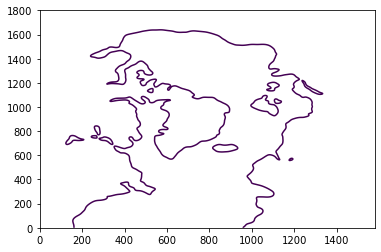

In [79]:
cont = make_contours(niv,lev)


In [80]:
a = np.where(cont==p)
a

(array([], dtype=int64),)

In [75]:
print(p)
print(cont[0][a])
len(cont[0][a])
cont[0][a][1]

(836, 440)
[836. 836. 836. 440.]


836.0

In [83]:
cont[3]

array([[129.        , 689.92533933],
       [130.        , 689.92040442],
       [130.44968742, 690.        ],
       [131.        , 690.09472567],
       [132.        , 690.4183904 ],
       [133.        , 690.8551883 ],
       [133.26303257, 691.        ],
       [134.        , 691.39525628],
       [134.98820836, 692.        ],
       [135.        , 692.00706542],
       [136.        , 692.69623263],
       [136.40647302, 693.        ],
       [137.        , 693.43753281],
       [137.71339926, 694.        ],
       [138.        , 694.2243963 ],
       [138.93616366, 695.        ],
       [139.        , 695.05288611],
       [140.        , 695.92616721],
       [140.08142869, 696.        ],
       [141.        , 696.84068708],
       [141.16939885, 697.        ],
       [142.        , 697.7941271 ],
       [142.21084912, 698.        ],
       [143.        , 698.78896043],
       [143.20793074, 699.        ],
       [144.        , 699.82897282],
       [144.16188437, 700.        ],
 

In [76]:
cont

[array([[959.19434324,   0.        ],
        [959.33633826,   1.        ],
        [959.60784244,   2.        ],
        ...,
        [161.77407034,   2.        ],
        [161.78605203,   1.        ],
        [161.79220654,   0.        ]]),
 array([[1177.        ,  557.97508332],
        [1178.        ,  557.43753179],
        [1179.        ,  557.26819775],
        [1180.        ,  557.29488304],
        [1181.        ,  557.44386343],
        [1182.        ,  557.6791424 ],
        [1183.        ,  557.98190816],
        [1183.04664319,  558.        ],
        [1184.        ,  558.37122315],
        [1185.        ,  558.80950882],
        [1185.37907345,  559.        ],
        [1186.        ,  559.31755278],
        [1187.        ,  559.88354732],
        [1187.18422353,  560.        ],
        [1188.        ,  560.53433558],
        [1188.65211431,  561.        ],
        [1189.        ,  561.26199309],
        [1189.89628079,  562.        ],
        [1190.        ,  562.09203161

In [7]:
d_hbx = bathym.isel(y=slice(0,1149)).diff(dim='x')
d_hby = bathym.isel(x=slice(0,1199)).diff(dim='y')

len_bat = np.sqrt((d_hbx/zonal)**2 + (d_hby/merd)**2)

d_hbxg = d_hbx.rolling(x = 10,).mean()
d_hbyg = d_hby.rolling(y = 10,).mean()

len_batg = np.sqrt((d_hbxg/zonal)**2 + (d_hbyg/merd)**2)

In [16]:
print(zonal.shape)
print(d_hbxg.shape)

(1149, 1199)

In [18]:
x=moor_l[0][0]
y=moor_l[0][1]

In [37]:
b = np.array([float(d_hbxg.isel(x=x,y=y).values),float(zonal.isel(x=x,y=y).values)])
d = np.array([float(d_hbyg.isel(x=x,y=y)),float(merd.isel(x=x,y=y))])

In [32]:
b

array([[-0.8       ],
       [31.15001869]])

In [44]:
up = u.isel(x=x,y=y)
vp = v.isel(x=x,y=y)

In [47]:
np.sqrt(b**2 + d**2)

array([ 1.        , 87.01829528])

In [45]:
up.shape

(73, 75)

In [48]:
#vel_par = (up*b + vp*d)/(np.sqrt(b**2 + d**2))
#vel_ort = (up*d - vp*b)/(np.sqrt(b**2 + d**2))

/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


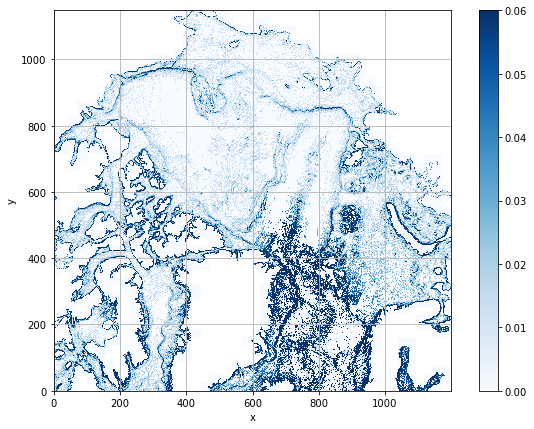

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

cmap = plt.get_cmap('Blues')
c = len_bat.plot(vmin=0, vmax=0.06, cmap=cmap, add_colorbar=False)
#for i,p in enumerate(moor_l):
#    ax.plot(p[0], p[1], marker='o', color=c_list[i])
fig.colorbar(c,
             shrink=1,
             #label=r"Depth [m]"
            )
ax.grid('on')
ax.set_aspect('equal')

In [9]:
def PCz(x,y):
    'Finding the level the given location dosent have values for anymore'

    d = bathym.isel(x=x, y=y).values

    dypu = u.isel(x=x, y=y, depth = slice(0,d-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
    dypv = v.isel(x=x, y=y, depth = slice(0,d-1))
    
    covu = np.cov(dypu.T, bias=True) # uten .T ble den en 73x73 matrise 
    values_u, vectors_u = np.linalg.eig(covu)
    order_u = values_u.argsort()[::-1]
    values_u, vectors_u = values_u[order_u], vectors_u[:, order_u]
    
    covv = np.cov(dypv.T, bias=True) # uten .T ble den en 73x73 matrise 
    values_v, vectors_v = np.linalg.eig(covv)
    order_v = values_v.argsort()[::-1]
    values_v, vectors_v = values_v[order_v], vectors_v[:, order_v]
    
    PC1u = (np.sqrt(values_u[0])*vectors_u[:,0])
    PC1v = (np.sqrt(values_v[0])*vectors_v[:,0])
    PC2u = (np.sqrt(values_u[1])*vectors_u[:,1])
    PC2v = (np.sqrt(values_v[1])*vectors_v[:,1])
    
    PVE1u = int(round(values_u[0]/np.sum(values_u)*100,0))
    PVE1v = int(round(values_v[0]/np.sum(values_v)*100,0))
    PVE2u = int(round(values_u[1]/np.sum(values_u)*100,0))
    PVE2v = int(round(values_v[1]/np.sum(values_v)*100,0))
    
    return PC1u, PC1v, PC2u, PC2v, dypu, dypv, PVE1u, PVE1v, PVE2u, PVE2v

In [10]:
'Making a function for the vertical PC'
def PCz_op(x,y):
    up = u.isel(y=y, x=x)
    vp = v.isel(y=y, x=x)
    
    b = d_hbxg.isel(x=x,y=y)/zonal.isel(x=x,y=y)
    d = d_hbyg.isel(x=x,y=y)/merd.isel(x=x,y=y)
    
    vel_par = (up*b + vp*d)/(np.sqrt(b**2 + d**2))
    vel_ort = (up*d - vp*b)/(np.sqrt(b**2 + d**2))
    
    # lag lengde scalar av bathym og dele u_o og u_p på 

    d_p = bathym.isel(y=y, x=x).values
    dyp_o = vel_ort.isel(depth = slice(0,int(d_p)-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
    dyp_p = vel_par.isel(depth = slice(0,int(d_p)-1))

    cov_o = np.cov(dyp_o.T, bias=True) # uten .T ble den en 73x73 matrise 
    cov_p = np.cov(dyp_p.T, bias=True)
    
    values_o, vectors_o = np.linalg.eig(cov_o)
    order_o = values_o.argsort()[::-1]
    values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
    values_p, vectors_p = np.linalg.eig(cov_p)
    order_p = values_p.argsort()[::-1]
    values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]
    
    PC1p = (np.sqrt(values_p[0])*vectors_p[:,0])
    PC1o = (np.sqrt(values_o[0])*vectors_o[:,0])
    PC2p = (np.sqrt(values_p[1])*vectors_p[:,1])
    PC2o = (np.sqrt(values_o[1])*vectors_o[:,1])
    
    PVE1p = int(round(values_p[0]/np.sum(values_p)*100,0))
    PVE1o = int(round(values_o[0]/np.sum(values_o)*100,0))
    PVE2p = int(round(values_p[1]/np.sum(values_p)*100,0))
    PVE2o = int(round(values_o[1]/np.sum(values_o)*100,0))
    
    return PC1p, PC1o, PC2p, PC2o, dyp_p, dyp_o, PVE1p, PVE1o, PVE2p, PVE2o

836 440


KeyboardInterrupt: 

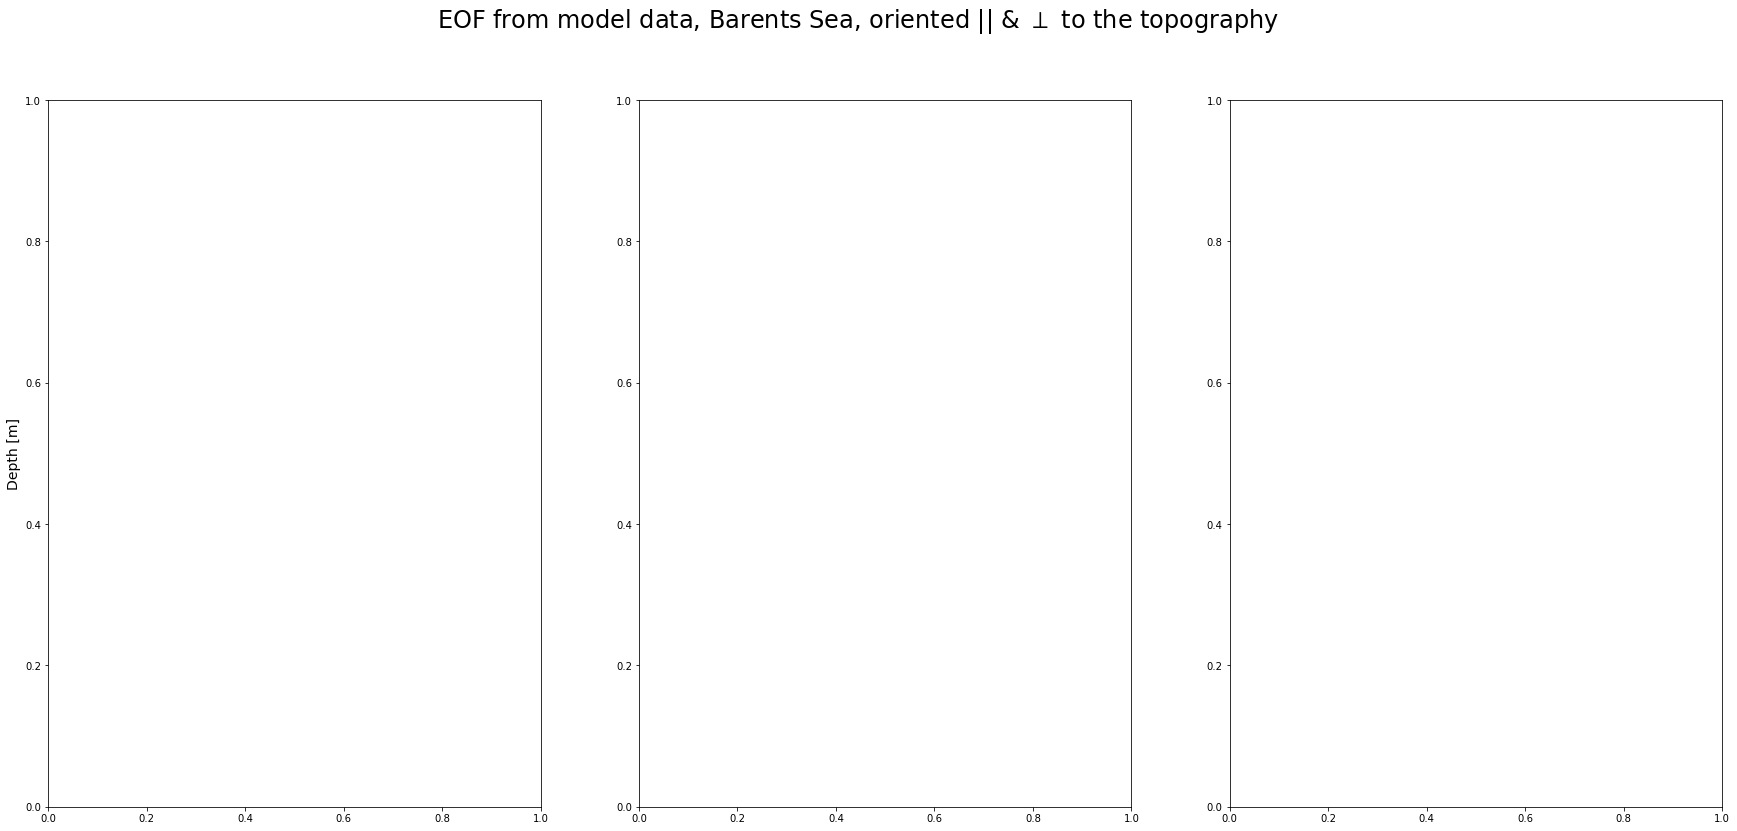

In [12]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,3,figsize = (30,13))
plt.suptitle('EOF from model data, Barents Sea, oriented $||$ & $\perp$ to the topography', 
             horizontalalignment='center',
            fontsize=24)
bar = [(836, 440),(838, 440),(836, 439)]
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, p in zip(axes.flat, range(len(bar))):
    pp = moor_l[p]
    print(pp[0], pp[1])    
    PC1p, PC1o, PC2p, PC2o, dypp, dypo, PVE1p, PVE1o, PVE2p, PVE2o = PCz_op(pp[0],pp[1])
        
    axs.plot(PC1p,dypp.depth, 'navy', label = f'EOF1$||$, PVE={PVE1p}%')
    axs.plot(PC1o,dypo.depth, 'cornflowerblue', label = f'EOF1$\perp$, PVE={PVE1o}%')
    axs.plot(PC2p,dypp.depth, 'navy', linestyle = '--', label = f'EOF2$||$, PVE={PVE2p}%')
    axs.plot(PC2o,dypo.depth, 'cornflowerblue', linestyle = '--', label = f'EOF2$\perp$, PVE={PVE2p}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [cm/s]', fontsize=14)

#fig.tight_layout()   

#plt.savefig('EOF_Barents_mod_topo.pdf', dpi = 300)